In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder,RobustScaler,OrdinalEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import seaborn as sns

#REVENUE

In [ ]:
df2=pd.read_csv('/content/train.csv')
df2.head(2)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0


In [ ]:
df2=df2.drop(columns=['Open Date'])

In [ ]:
for columns in ['City','City Group','Type']:
  print(columns,":",df2[columns].unique())

City : ['İstanbul' 'Ankara' 'Diyarbakır' 'Tokat' 'Gaziantep' 'Afyonkarahisar'
 'Edirne' 'Kocaeli' 'Bursa' 'İzmir' 'Sakarya' 'Elazığ' 'Kayseri'
 'Eskişehir' 'Şanlıurfa' 'Samsun' 'Adana' 'Antalya' 'Kastamonu' 'Uşak'
 'Muğla' 'Kırklareli' 'Konya' 'Karabük' 'Tekirdağ' 'Denizli' 'Balıkesir'
 'Aydın' 'Amasya' 'Kütahya' 'Bolu' 'Trabzon' 'Isparta' 'Osmaniye']
City Group : ['Big Cities' 'Other']
Type : ['IL' 'FC' 'DT']


In [ ]:
x=df2.drop('revenue',axis=1)
y=df2['revenue']

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=42)

In [ ]:
num_col=xtrain.select_dtypes(include='number').columns
cat_col=xtrain.select_dtypes(exclude='number').columns

In [ ]:
preprocessing=ColumnTransformer(
    transformers=[
        ('scaler',RobustScaler(),num_col),
        ('onehotencoder',OneHotEncoder(sparse_output=False,handle_unknown='ignore'),cat_col.drop('City Group')),
        ('ordinalencoder',OrdinalEncoder(),['City Group'])
    ]
)

In [ ]:
decisiontreepipeline=Pipeline(
    steps=[
        ('preprocessing',preprocessing),
        ('model',DecisionTreeRegressor( ))
    ]
)
decisiontreepipeline.fit(xtrain,ytrain)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  Index(['Id', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10',
       'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20',
       'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30',
       'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37'],
      dtype='object')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['City', 'Type'], dtype='object')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['City Group'])])),
                ('model', DecisionTreeRegressor())])

In [ ]:
print("Train_score:",decisiontreepipeline.score(xtrain,ytrain))
print("Test_score:",decisiontreepipeline.score(xtest,ytest))

Train_score: 1.0
Test_score: -0.22731433501347031


In [ ]:
random_forestpipeline=Pipeline(
     steps=[
        ('preprocessing',preprocessing),
        ('model',RandomForestRegressor())
    ]
)
random_forestpipeline.fit(xtrain,ytrain)
'''
Random Forest:
n_estimator=100
base estimator=decisiontree
if max_features is 2(total 5 feature),
randomly selects 2 and selects a feature randomly from max_features=2,
example :feature1,feature2,feature3,feature4,feature5,
max_feature=2
randomly selects 2 =>feature1,feature4
selected feature for rootnode is feature1(random)
Bagging:
n_estimator=10
if max_feature is 2(total 5 feature)
base estimator =None by default,we can use decisiontree,SVM,KNN,Naivebayes(bagging classifier)
if max_features is 2(total 5 features)
randomly selects 2 and checks which feature(IG/Gini Impurity) is best.
'''


'\nRandom Forest:  \nn_estimator=100    \nbase estimator=decisiontree \nif max_features is 2(total 5 feature),\nrandomly selects 2 and selects a feature randomly from max_features=2,\nexample :feature1,feature2,feature3,feature4,feature5,\nmax_feature=2\nrandomly selects 2 =>feature1,feature4\nselected feature for rootnode is feature1(random)\nBagging:\nn_estimator=10 \nif max_feature is 2(total 5 feature)\nbase estimator =None by default,we can use decisiontree,SVM,KNN,Naivebayes(bagging classifier) \nif max_features is 2(total 5 features)\nrandomly selects 2 and checks which feature(IG/Gini Impurity) is best.\n'

In [ ]:
print("Train_score:",random_forestpipeline.score(xtrain,ytrain))
print("Test_score:",random_forestpipeline.score(xtest,ytest))

Train_score: 0.8338674707370693
Test_score: 0.16571814901681725


In [ ]:
baggingpipeline=Pipeline(
     steps=[
        ('preprocessing',preprocessing),
        ('model',BaggingRegressor(estimator=SVR()))
    ]
)
baggingpipeline.fit(xtrain,ytrain)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  Index(['Id', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10',
       'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20',
       'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30',
       'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37'],
      dtype='object')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['City', 'Type'], dtype='object')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['City Group'])])),
                ('model', BaggingRegressor(estimator=SVR()))])

In [ ]:
print("Train_score:",baggingpipeline.score(xtrain,ytrain))
print("Test_score:",baggingpipeline.score(xtest,ytest))

Train_score: -0.0285564070343578
Test_score: -0.04737621534319647


In [ ]:
df2.select_dtypes(include='number').corr()['revenue']

,revenue
Id,-0.006277
P1,0.070217
P2,0.191518
P3,-0.024613
P4,0.035685
P5,-0.028191
P6,0.139094
P7,0.051165
P8,-0.084215
P9,-0.050352


<Axes: >

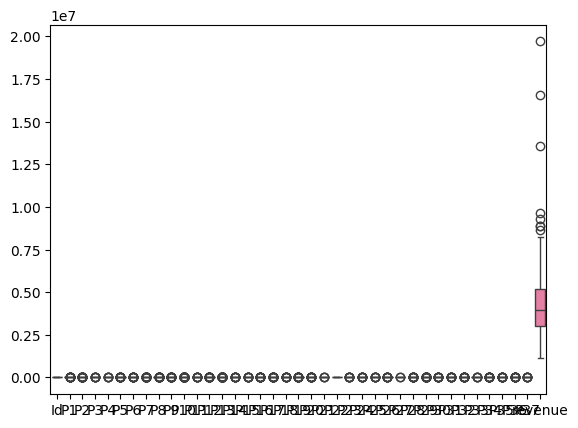

In [ ]:
sns.boxplot(df2)

#TEST DATA

#CAR PRICE

In [ ]:
df=pd.read_csv("/content/train (4).csv")
df.head(4)

,id,brand,model_id,year,transmission,fuelType,mileage,tax,mpg,engineSize,price
0,53394,3,17,2019,Automatic,Diesel,7148,145,50.4,2.0,29990
1,27771,2,44,2018,Manual,Diesel,19254,150,60.1,2.0,15750
2,22402,2,33,2017,Manual,Petrol,13275,145,60.1,1.0,10400
3,29944,2,32,2018,Manual,Petrol,20106,145,65.7,1.0,10595


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38199 entries, 0 to 38198
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            38199 non-null  int64  
 1   brand         38199 non-null  int64  
 2   model_id      38199 non-null  int64  
 3   year          38199 non-null  int64  
 4   transmission  38199 non-null  object 
 5   fuelType      38199 non-null  object 
 6   mileage       38199 non-null  int64  
 7   tax           38199 non-null  int64  
 8   mpg           38199 non-null  float64
 9   engineSize    38199 non-null  float64
 10  price         38199 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 3.2+ MB


In [ ]:
for columns in ['transmission','fuelType']:
  print(columns,":",df[columns].unique())

transmission : ['Automatic' 'Manual' 'Semi-Auto']
fuelType : ['Diesel' 'Petrol' 'Hybrid' 'Other' 'Electric']


In [ ]:
x=df.drop('price',axis=1)
y=df['price']

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=42)

In [ ]:
num_col=xtrain.select_dtypes(include='number').columns
cat_col=xtrain.select_dtypes(exclude='number').columns

In [ ]:
preprocessing=ColumnTransformer(
    transformers=[
        ('scaler',RobustScaler(),num_col),
        ('onehotencoder',OneHotEncoder(sparse_output=False,handle_unknown='ignore'),cat_col),
    ]
)

In [ ]:
decisiontreepipeline=Pipeline(
    steps=[
        ('preprocessing',preprocessing),
        ('model',DecisionTreeRegressor())
    ]
)
decisiontreepipeline.fit(xtrain,ytrain)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  Index(['id', 'brand', 'model_id', 'year', 'mileage', 'tax', 'mpg',
       'engineSize'],
      dtype='object')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['transmission', 'fuelType'], dtype='object'))])),
                ('model', DecisionTreeRegressor())])

In [ ]:
print("Train_score:",decisiontreepipeline.score(xtrain,ytrain))
print("Test_score:",decisiontreepipeline.score(xtest,ytest))

Train_score: 1.0
Test_score: 0.9293097010268436


In [ ]:
random_forestpipeline=Pipeline(
     steps=[
        ('preprocessing',preprocessing),
        ('model',RandomForestRegressor( ))
    ]
)
random_forestpipeline.fit(xtrain,ytrain)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  Index(['id', 'brand', 'model_id', 'year', 'mileage', 'tax', 'mpg',
       'engineSize'],
      dtype='object')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['transmission', 'fuelType'], dtype='object'))])),
                ('model', RandomForestRegressor())])

In [ ]:
print("Train_score:",random_forestpipeline.score(xtrain,ytrain))
print("Test_score:",random_forestpipeline.score(xtest,ytest))

Train_score: 0.9937541206006298
Test_score: 0.9611561314360426


In [ ]:
baggingpipeline=Pipeline(
     steps=[
        ('preprocessing',preprocessing),
        ('model',BaggingRegressor(estimator=SVR()))
    ]
)
baggingpipeline.fit(xtrain,ytrain)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  Index(['id', 'brand', 'model_id', 'year', 'mileage', 'tax', 'mpg',
       'engineSize'],
      dtype='object')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['transmission', 'fuelType'], dtype='object'))])),
                ('model', BaggingRegressor(estimator=SVR()))])

In [ ]:
print("Train_score:",baggingpipeline.score(xtrain,ytrain))
print("Test_score:",baggingpipeline.score(xtest,ytest))

Train_score: 0.19471888156372108
Test_score: 0.20041199967309775


#TEST DATA

In [ ]:
df1=pd.read_csv("/content/test (1).csv")
df1.head(2)

,id,brand,model_id,year,transmission,fuelType,mileage,tax,mpg,engineSize
0,52462,3,74,2016,Manual,Diesel,31353.819030,20.633243,58.036574,1.918948
1,29710,2,86,2019,Manual,Diesel,10799.605446,138.093173,30.926330,1.941589


In [ ]:
y_pred=decisiontreepipeline.predict(df1)
y_pred

array([14698., 26922., 15500., ..., 11200., 39881., 15498.])

In [ ]:
y=decisiontreepipeline.predict(xtest)
y

array([14995., 14380., 21965., ..., 14575., 12399., 17500.])

In [ ]:
y_rpred=random_forestpipeline.predict(df1)
y_rpred

array([14429.19, 27756.38, 14968.15, ..., 10752.72, 37492.02, 14286.19])

In [ ]:
y1=random_forestpipeline.predict(xtest)
y1

array([15726.03, 13646.75, 22081.7 , ..., 14162.87, 12069.95, 16674.75])

In [ ]:
r2_score(ytest,y)#decision tree

0.9293097010268436

In [ ]:
r2_score(ytest,y1)#random forest

0.9611561314360426

In [ ]:
id=df1['id']

In [ ]:
new_df=pd.DataFrame({'Id':id,'DTpredicted values':y_pred,'RFpredicted values':y_rpred})
new_df

,Id,DTpredicted values,RFpredicted values
0,52462,14698.0,14429.19
1,29710,26922.0,27756.38
2,21277,15500.0,14968.15
3,31612,12995.0,12815.39
4,53244,19299.0,20665.05
...,...,...,...
16367,37536,9295.0,9515.36
16368,53520,19899.0,19927.55
16369,48008,11200.0,10752.72
16370,6295,39881.0,37492.02


In [ ]:
new_df.to_csv('submission.csv',index=False)